In [55]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import dataframe_image as dfi
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Print iterations progress
def printProgressBar (iteration, total, filename, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', filename, end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
def print_dataframe(df, filename):
    with pd.option_context('display.max_columns', None, 'display.expand_frame_repr', False, 'display.max_rows', 5, 'display.width', None, 'display.max_colwidth', None):
        display(df)
        dfi.export(df, filename, max_rows=5, max_cols=5)

In [49]:
df = pd.read_csv('./UkraineTweets./0501_UkraineCombinedTweetsDeduped.csv')
print_dataframe(df, 'TweetDatasetTable.png')

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,is_retweet,original_tweet_id,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,0,529588633,PLinToronto,Consulate General of the Republic of Poland in Toronto. For photos and more visit our FB profile https://t.co/J7d8YnMP28\n\nConsul General Mrs. Magdalena Pszczółkowska,"Toronto, Ontario",674,2977,10112,2012-03-19 18:10:36.000000,1520553587276795905,2022-05-01 00:00:00.000000,2,"Remember this 👇 image next time you fix a meal for your family.\n\nEvery day, Russia sells 700M euro worth of oil and gas to the world. It's your tax money, too.\n\nWe🇵🇱 say there can't be business as usual when 🇺🇦 starve in their besieged cities!\n\n#StopRussianOil, #StopRussiaNow!🚫 https://t.co/O8TAlUf1rY","[{'text': 'StopRussianOil', 'indices': [245, 260]}, {'text': 'StopRussiaNow', 'indices': [262, 276]}]",en,NaN,5,False,0,0,NaN,0,0,NaN,False,0,0,NaN,2022-05-01 09:12:42.918515
1,1,835922746416762880,arctic_fox_PTN,News of the war in Ukraine. Chronicle of Putin's Russia decadence. Новости войны в Украине. Хроника упадка путинской России.,Украина,368,158,62968,2017-02-26 18:41:28.000000,1520553587490926594,2022-05-01 00:00:00.000000,23,🇺🇦 Збройні Сили України продовжують повертати під контроль населені пункти на околицях Харкова\n\nУ результаті наступу підрозділів відновлено контроль над населеним пунктом Верхня Роганка\n\nДеталі: https://t.co/xNz2Uamq1N\n\n#Україна #Ukraine,[],uk,NaN,0,True,1520471236798828544,1102047326,mil_in_ua,0,0,NaN,False,0,0,NaN,2022-05-01 00:21:48.021996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351885,351885,345096523,NepomaA,NaN,🌎,598,89,3910,2011-07-30 02:02:40.000000,1520915971816542211,2022-05-01 23:59:59.000000,24,"Resident of #Mariupol:\n""#Azov were hiding among schools, kindergartens, covered themselves with children, women, they were hiding behind maternity hospitals. And you call it warriors?\nThey started to change into women’s clothes, wigs, tried to slip through the green corridor."" https://t.co/ip7uC2W55a","[{'text': 'Mariupol', 'indices': [27, 36]}, {'text': 'Azov', 'indices': [39, 44]}]",en,NaN,0,True,1520907435275337728,1507843925947600896,ZradaXXII,0,0,NaN,False,0,0,NaN,2022-05-02 00:18:47.954457
351886,351886,982538740571795456,Tro_breiz,NaN,NaN,3922,1450,191725,2018-04-07 08:41:05.000000,1520915973439692801,2022-05-01 23:59:59.000000,27,@aragon_jb Ce #Biden nous prend pour des imbéciles !,"[{'text': 'Biden', 'indices': [27, 33]}]",fr,NaN,0,True,1520897110861877248,2365378849,YvesPDB,0,0,NaN,False,0,0,NaN,2022-05-02 00:13:27.035208


In [43]:
df = pd.read_csv('./geolocation_final.csv')
print_dataframe(df, 'GeolocationTable.png')

,city_name,city_latitude,city_longitude,state_code,state_name,state_latitude,state_longitude,country_code,country_name,country_latitude,country_longitude
0,Ashkāsham,36.68333,71.53333,BDS,Badakhshan,36.734772,70.811995,AF,Afghanistan,33.0,65.0
1,Fayzabad,37.11664,70.58002,BDS,Badakhshan,36.734772,70.811995,AF,Afghanistan,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
148064,Shurugwi District,-19.75000,30.16667,MI,Midlands Province,-19.055201,29.603549,ZW,Zimbabwe,-20.0,30.0
148065,Zvishavane District,-20.30345,30.07514,MI,Midlands Province,-19.055201,29.603549,ZW,Zimbabwe,-20.0,30.0


In [83]:
# assign directory
directory = './preprocessed/'
 
# iterate over files in
# that directory
columns = 0
rows = 0
total = sum([len(files) for r, d, files in os.walk(directory)])
count = 0
tweet_counts = []
popularity_scores = []
reach_scores = []
sentiment_scores = []
for root, dirs, files in os.walk(directory):
    for filename in files:
        count += 1
        df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')
        tweet_counts.append(len(df.index))
        popularity_scores.append(df['popularity_score'].sum())
        reach_scores.append(df['reach_score'].sum())
        printProgressBar(count, total, filename=os.path.join(root, filename))
print('Columns (avg):', columns/total)
print('Total rows:', rows)
x = np.arange(0, 14)
print(tweet_counts)
print(popularity_scores)
print(reach_scores)
tick_label = ['2022 Mar', '2022 Apr', '2022 May', '2022 Jun', '2022 Jul', '2022 Aug', '2022 Sep', '2022 Oct', '2022 Nov', '2022 Dec', '2023 Jan', '2023 Feb', '2023 Mar', '2023 Apr']

C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/157660563.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/157660563.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/157660563.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/157660563.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/157660563.py:17: DtypeWarning: Columns (9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0%  ./preprocessed/UkraineTweetsPreprocessed_2023_04.csv
Columns (avg): 0.0
Total rows: 0
[3677324, 2896412, 2398209, 1598293, 1219914, 558195, 319996, 334132, 281634, 284873, 223345, 370342, 785197, 385610]
[3547918588, 2724744639, 1406446436, 1028934742, 448183589, 380775881, 4067953, 4269947, 3054283, 2662285, 2045763, 28164595, 185040968, 131083110]
[22241685809, 22241685809, 16644855674, 16644855674, 16142249423, 16142249423, 9213658503, 9213658503, 6635880365, 6635880365, 6704784774, 6704784774, 5780010009, 5780010009, 4795316472, 4795316472, 4513107482, 4513107482, 3846809693, 3846809693, 3037585126, 3037585126, 5135760545, 5135760545, 6288534862, 6288534862, 2890419401, 2890419401]


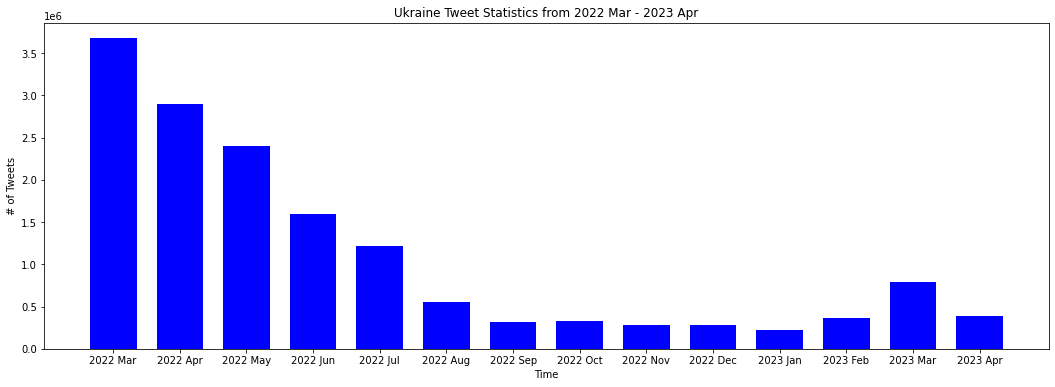

<Figure size 864x1728 with 0 Axes>

In [84]:
fig = plt.figure(figsize=(18, 6))
plt.bar(x, height=tweet_counts, tick_label = tick_label, width = 0.7, color = ['blue'])
# naming the x-axis
plt.xlabel('Time')
# naming the y-axis
plt.ylabel('# of Tweets')
# plot title
plt.title('Ukraine Tweet Statistics from 2022 Mar - 2023 Apr')
plt.figure(figsize=(12, 24))
plt.show()

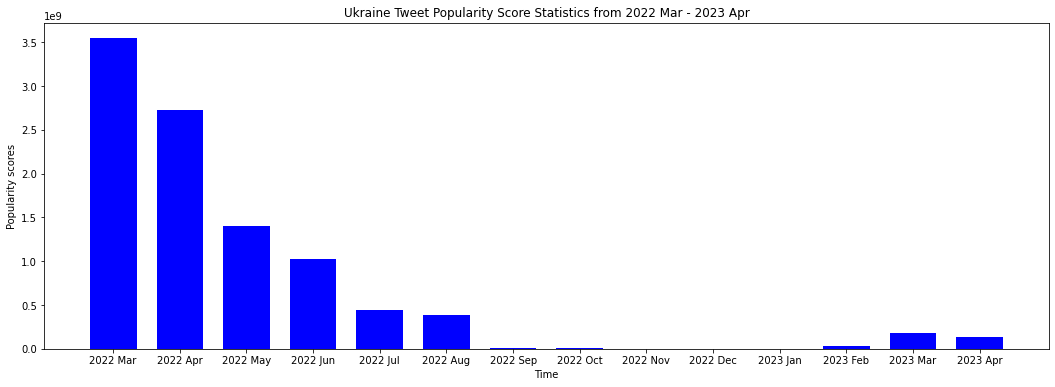

<Figure size 864x1728 with 0 Axes>

In [85]:
fig = plt.figure(figsize=(18, 6))
plt.bar(x, height=popularity_scores, tick_label = tick_label, width = 0.7, color = ['blue'])
plt.xlabel('Time')
plt.ylabel('Popularity scores')
plt.title('Ukraine Tweet Popularity Score Statistics from 2022 Mar - 2023 Apr')
plt.figure(figsize=(12, 24))
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

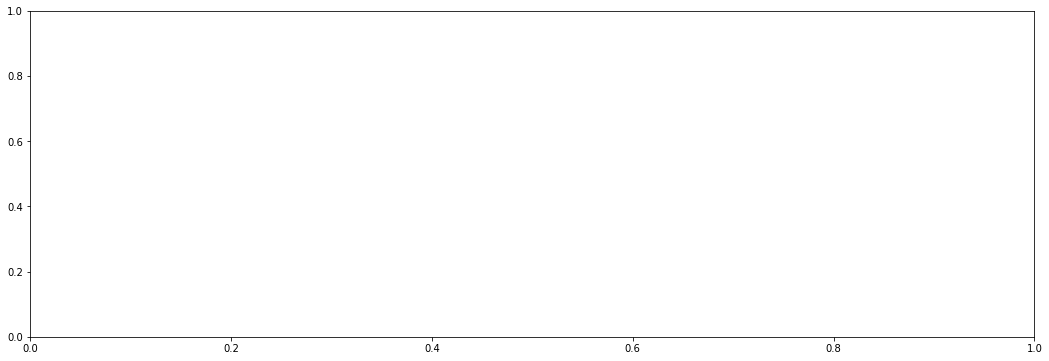

In [86]:
fig = plt.figure(figsize=(18, 6))
plt.bar(x, height=reach_scores, tick_label = tick_label, width = 0.7, color = ['blue'])
plt.xlabel('Time')
plt.ylabel('Reach scores')
plt.title('Ukraine Tweet Reach Score Statistics from 2022 Mar - 2023 Apr')
plt.figure(figsize=(12, 24))
plt.show()

14
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0%  ./merged_by_country_bert_processed_tweets/tweets_by_country_with_classification_2023_04.csv
{'Algeria': 8, 'Armenia': 4, 'Australia': 908, 'Austria': 16, 'Azerbaijan': 3, 'Bahamas The': 83, 'Bahrain': 6, 'Bangladesh': 298, 'Belgium': 58, 'Benin': 5, 'Bhutan': 1, 'Bolivia': 2, 'Bosnia and Herzegovina': 13, 'Botswana': 7, 'Brazil': 37, 'Bulgaria': 172, 'Cameroon': 8, 'Canada': 445, 'Cape Verde': 33, 'Chile': 21, 'China': 42, 'Colombia': 142, 'Congo': 1, 'Costa Rica': 5, 'Croatia': 9, 'Cuba': 11, 'Cyprus': 18, 'Czech Republic': 3, 'Denmark': 496, 'Dominican Republic': 5, 'Ecuador': 110, 'Egypt': 4, 'Estonia': 19, 'Ethiopia': 5, 'Finland': 53, 'France': 679, 'Georgia': 11, 'Germany': 345, 'Ghana': 76, 'Greece': 10, 'Guatemala': 1, 'Honduras': 4, 'Hungary': 18, 'India': 4245, 'Indonesia': 381, 'Iran': 79, 'Ireland': 263, 'Israel': 19, 'Italy': 1275, 'Jamaica': 33, 'Japan': 3279

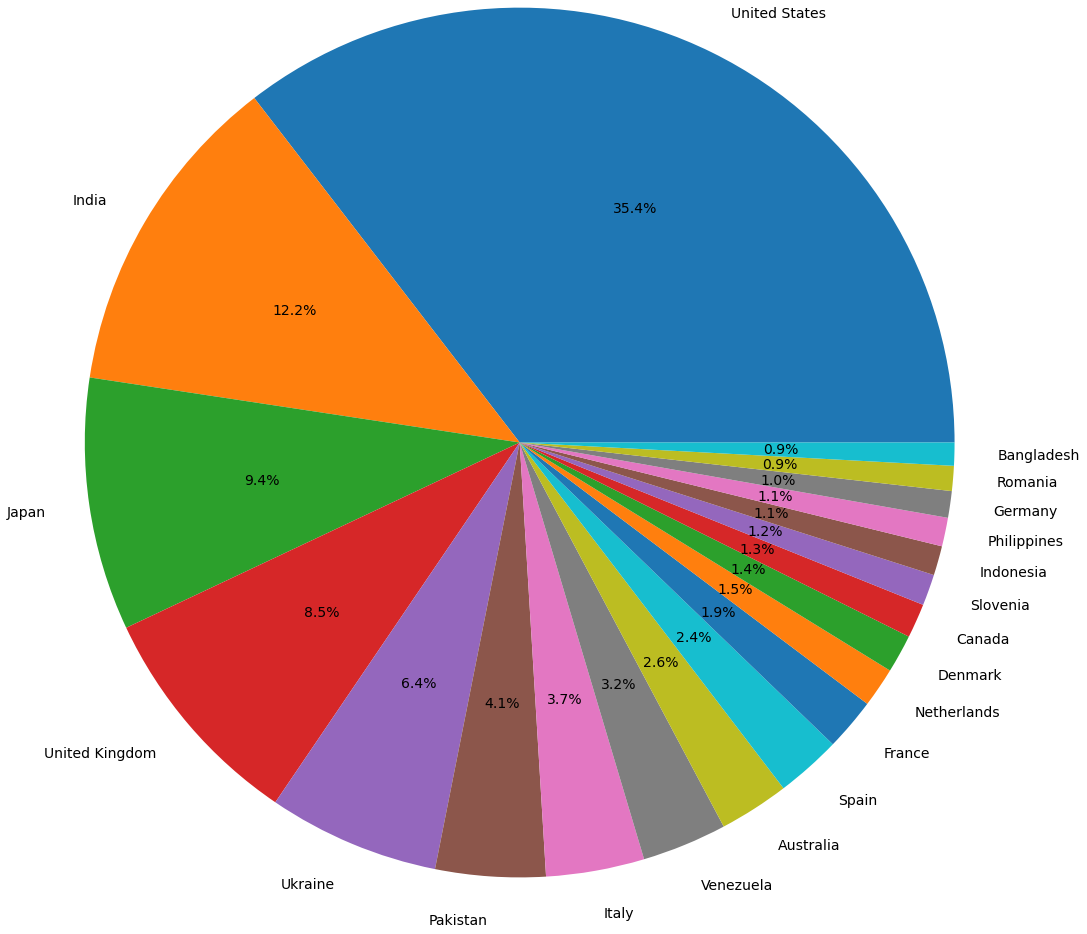

In [64]:
# assign directory
directory = './merged_by_country_bert_processed_tweets/'
 
# iterate over files in
# that directory
columns = 0
rows = 0
total = sum([len(files) for r, d, files in os.walk(directory)])
count = 0
print(total)
tweet_by_country = {}
sentiments_by_country = {}
for root, dirs, files in os.walk(directory):
    for filename in files:
        count += 1
        printProgressBar(count, total, filename=os.path.join(root, filename))
        df = pd.read_csv(os.path.join(root, filename), encoding='UTF-8')
        for index, tweet in df.iterrows():
            # location = tuple(0 if val.strip() == 'nan' else val.replace('\'','').strip() for val in tweet[0].strip('()').split(','))
            country = tweet[3]
            sentiment = tweet[-2]
            if country not in tweet_by_country:
                tweet_by_country[country] = 1
                sentiments_by_country[country] = {'POSITIVE':0, 'NEGATIVE':0}
                sentiments_by_country[country][sentiment] += 1
            else:
                tweet_by_country[country] += 1
                sentiments_by_country[country][sentiment] += 1
        # print(filename, sentiments_by_country['United States'])
sorted_tweet_by_country = dict(sorted(tweet_by_country.items(), key=lambda x:x[1], reverse=True))
countries = list(sorted_tweet_by_country.keys())[:20]
country_tweets = list(sorted_tweet_by_country.values())[:20]
fig, ax = plt.subplots()
ax.pie(country_tweets, labels=countries, autopct='%1.1f%%', radius=5, textprops={'fontsize': 14})

print(tweet_by_country)

C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/1058979647.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


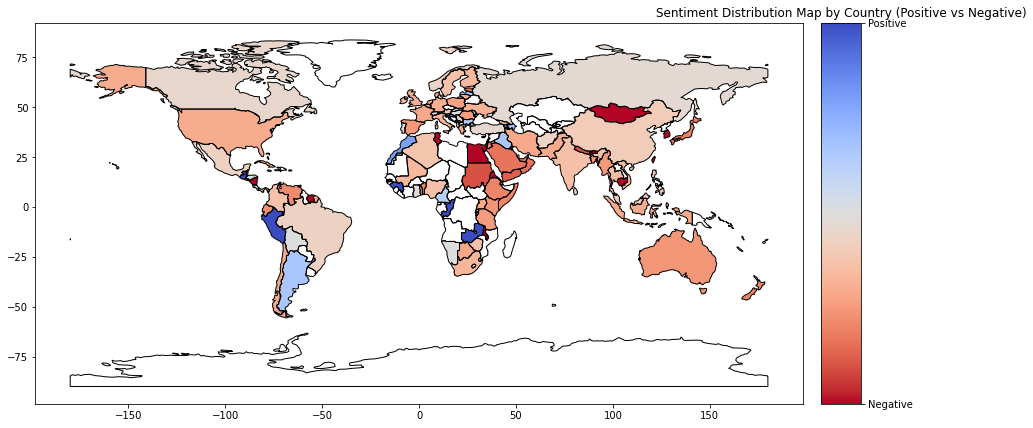

In [80]:
sentiment_map_dict = {'country':[], 'sentiment_sum':[]}
for country in sentiments_by_country.keys():
    if country == 'United States':
        sentiment_map_dict['country'].append('United States of America')
    else:
        sentiment_map_dict['country'].append(country)

    sentiment_map_dict['sentiment_sum'].append(int(sentiments_by_country[country]['POSITIVE']) / (int(sentiments_by_country[country]['NEGATIVE']) + int(sentiments_by_country[country]['POSITIVE'])))
# Fix the country name for United States
sentiment_df = pd.DataFrame(sentiment_map_dict)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the sentiment data with the world GeoDataFrame using the 'country' column
world_merged = world.merge(sentiment_df, left_on='name', right_on='country')

# Plot the sentiment distribution on the world map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm_r')
sm.set_array(world_merged['sentiment_sum'])

world_merged.plot(column='sentiment_sum', cmap='coolwarm_r', ax=ax)

# Customize the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_ticks([cbar.vmin, cbar.vmax])
cbar.set_ticklabels(['Negative', 'Positive'])

plt.title("Sentiment Distribution Map by Country (Positive vs Negative)")
plt.show()

In [20]:
directory = './merged_by_country_bert_processed_tweets'
for root, dirs, files in os.walk(directory):
    for filename in files:
        df = pd.read_csv(root+'/'+filename, encoding='UTF-8')
        tweet_counts.append(len(df.index))
        pos = 0
        neu = 0
        neg = 0
        for index, row in df.iterrows():
            # print(row['4'])
            if row['sentiment'] == 'POSITIVE':
                pos += 1
            elif row['sentiment'] == 'NEGATIVE':
                neg += 1
            else:
                neu += 1
                # printProgressBar(count, total, filename=os.path.join(root, filename))
            count+=1
        print(filename)
        print('Positives:',pos, 'Negatives:',neg, 'Errors:',neu)
print('total tweets:', count)

tweets_by_country_with_classification_2022_03.csv
Positives: 3238 Negatives: 6553 Errors: 0
tweets_by_country_with_classification_2022_04.csv
Positives: 1760 Negatives: 4566 Errors: 0
tweets_by_country_with_classification_2022_05.csv
Positives: 1564 Negatives: 4664 Errors: 0
tweets_by_country_with_classification_2022_06.csv
Positives: 1036 Negatives: 2034 Errors: 0
tweets_by_country_with_classification_2022_07.csv
Positives: 792 Negatives: 1816 Errors: 0
tweets_by_country_with_classification_2022_08.csv
Positives: 449 Negatives: 1726 Errors: 0
tweets_by_country_with_classification_2022_09.csv
Positives: 292 Negatives: 818 Errors: 0
tweets_by_country_with_classification_2022_10.csv
Positives: 335 Negatives: 846 Errors: 0
tweets_by_country_with_classification_2022_11.csv
Positives: 236 Negatives: 436 Errors: 0
tweets_by_country_with_classification_2022_12.csv
Positives: 334 Negatives: 553 Errors: 0
tweets_by_country_with_classification_2023_01.csv
Positives: 191 Negatives: 374 Errors: 0
